In [1]:
%matplotlib inline

from collections import defaultdict, Counter
import urllib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# from mpl_toolkits.mplot3d import Axes3D

from sklearn import (preprocessing, manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, cluster)

import scipy.cluster.hierarchy
import scipy.spatial.distance

from sklearn.metrics import pairwise_distances

import seaborn as sns
import pandas as pd

## Distances and similarities

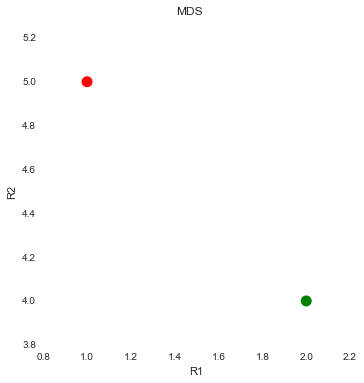

Euclidean
 [[ 0.          1.41421356]
 [ 1.41421356  0.        ]]

Manhattan
 [[ 0.  2.]
 [ 2.  0.]]
[[ 6.  0.  1.]
 [ 2.  1.  3.]]

Euclidean
 [[ 0.          4.58257569]
 [ 4.58257569  0.        ]]

Cosine
 [[ 0.          0.21663202]
 [ 0.21663202  0.        ]]
Manhattan
 [[ 0.  7.]
 [ 7.  0.]]
Correlation is invariant
 [[ 0.          0.84445725]
 [ 0.84445725  0.        ]]


In [2]:
X = np.array([[1, 5], 
              [2, 4]])


fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
ax.scatter(X[...,0], X[...,1], c=("red", "green"), s=120, edgecolors='none')
ax.set_autoscale_on(False)
ax.axis('square')

ax.set_xlabel('R1')
ax.set_ylabel('R2')
fig.suptitle("MDS")
plt.show()

D = pairwise_distances(X, metric = 'euclidean')
print("Euclidean\n", D)
print()


D = pairwise_distances(X, metric = 'manhattan')
print("Manhattan\n", D)


X = np.array([[6, 0.0, 1.0], 
              [2, 1, 3.0]])


# X = np.array([[0.6, 0.0, 0.6, 0], 
#               [0.3, 1.01, 0.3, 0.0]])

print(X)
print()

# euclidean(X[0], X[1])

D = pairwise_distances(X, metric = 'euclidean')
print("Euclidean\n", D)
print()

D = pairwise_distances(X + 1, metric = 'cosine')
print("Cosine\n", D)

D = pairwise_distances(X, metric = 'manhattan')
print("Manhattan\n", D)

D = pairwise_distances(X + 10, metric = 'correlation')
print("Correlation is invariant\n", D)

Minkowsky distance:  $\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p}$

for Euclidean: p=2

for Manhattan: p=1

In [3]:
## Binary data

In [4]:

binary = np.array([[0, 0, 1, 1, 1, 0, 0], 
                   [0, 1, 1, 1, 0, 0, 0]])

print(binary)

D = pairwise_distances(binary, metric = 'jaccard')
print("\nJaccard\n", D)

D = pairwise_distances(binary, metric = 'hamming')
print("\nHamming\n", D)



[[0 0 1 1 1 0 0]
 [0 1 1 1 0 0 0]]

Jaccard
 [[ 0.   0.5]
 [ 0.5  0. ]]

Hamming
 [[ 0.          0.28571429]
 [ 0.28571429  0.        ]]


## The concept of dimensionality reduction

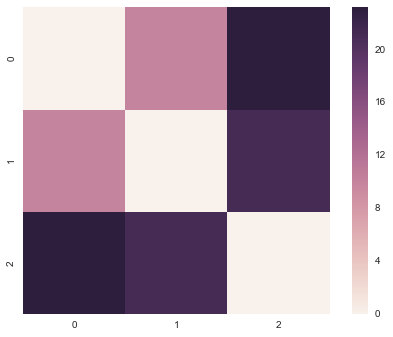

In [5]:
# Original data points (can be unknown)

X = np.array([[0, 0, 0, 0], [5, 5, 5, 5], [5, 4, -10, 20]])

# Pairwise distances
D = pairwise_distances(X, metric = 'euclidean')

# Importantly, only pairwise distances could be given as an input
# D = np.array([[0,  10,  4],
#               [10,  0,  7],
#               [ 4,  7,  0]])

sns.heatmap(D, square=True)
plt.show()


Stress 0.0130170220112


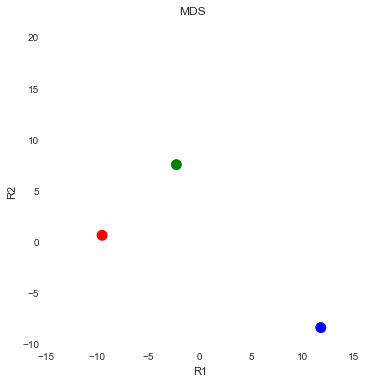

In [6]:

# Transformation

M = manifold.MDS(n_components=2, n_init=1, max_iter=10000, metric=True, dissimilarity="precomputed")
K = M.fit_transform(D)
print("Stress", M.stress_)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
ax.scatter(K[...,0], K[...,1], c=("red", "green", "blue"), s=120, edgecolors='none')
ax.set_autoscale_on(False)
ax.axis('square')

ax.set_xlabel('R1')
ax.set_ylabel('R2')
fig.suptitle("MDS")
plt.show()



## Synthetic dataset

[[ -0.63762777   4.09104705   1.15980096   1.28456616]
 [  9.48153019  -1.35453059   6.19086716   1.28447156]
 [ -2.69205385   3.81870875  -0.78259334   6.29921633]
 [  2.20656076   5.50616718   1.6679407    0.59536091]
 [  9.28375523  -0.54529913   5.96141285   0.97988776]
 [ -2.19936446   2.5583291   -2.06140206   6.10917741]
 [ -2.03770915   1.73725008  -1.276438     8.26379189]
 [ -0.07228289   2.88376939   0.34899733   2.84843906]
 [ -0.38750333   1.68305644  -0.84591413   7.15064992]
 [  8.1001318   -0.38754844   5.42088178  -0.16955642]
 [ -1.34947787   2.51610133  -2.87845412   8.29824227]
 [  8.57868735  -2.48080416   5.39934721   2.42716212]
 [ -2.43420238   2.96982766  -0.51916521   7.96444293]
 [ 11.15640591  -3.67892868   4.56401576   1.5472951 ]
 [ -0.03865182   4.81377144  -0.0694762    7.65553518]
 [  3.2460247    2.84942165   2.10102604   0.71047981]
 [ -2.59765663   3.97233399  -1.65143272   9.05790509]
 [  9.64968074  -3.43057041   6.13273894   1.90428429]
 [  8.4120

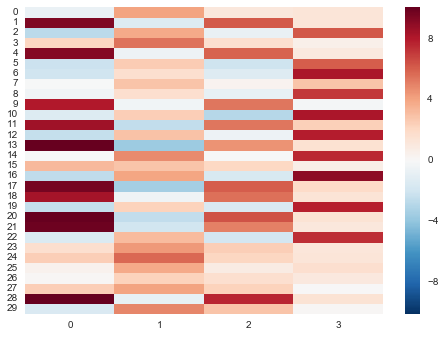

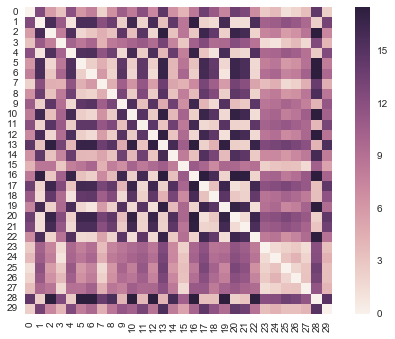

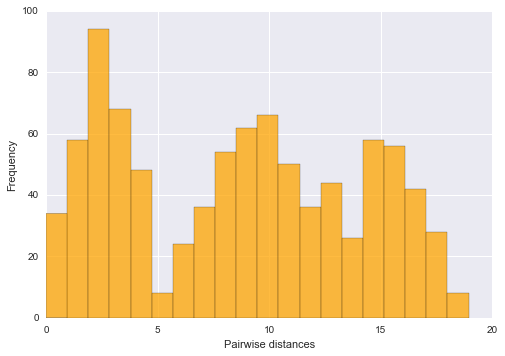

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=30, centers=3, n_features=4, random_state=0)
print(X)
sns.heatmap(X, robust=True, square=False, yticklabels=True, xticklabels=True, cbar=True)
plt.show()

D = pairwise_distances(X, metric='euclidean', n_jobs=-1)

sns.heatmap(D, robust=True, square=True, yticklabels=True, xticklabels=True, cbar=True)
plt.show()

plt.hist(np.hstack(D), 20, facecolor='orange', alpha=0.75)
plt.xlabel('Pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

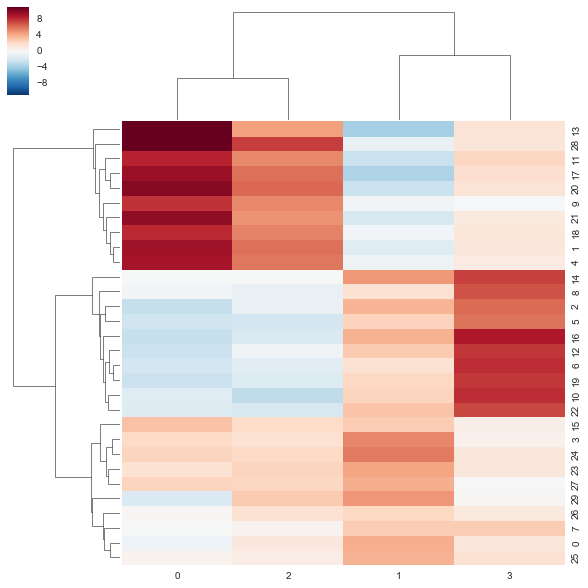

In [8]:
# Clustering is often used as an accessory
sns.clustermap(X)  # requires fastcluster package:  pip install fastcluster
plt.show()

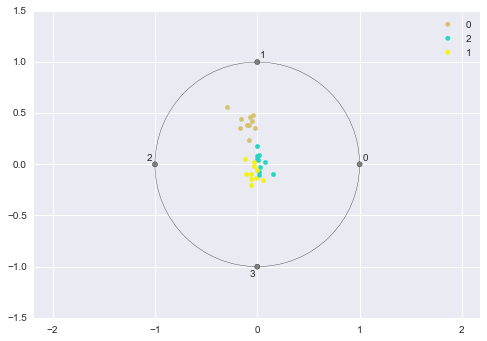

In [9]:
# How else to visualize data points in 4D?

# Radviz
df = pd.DataFrame(X)
df['class'] = y # Radviz requires a label for coloring classes
pd.tools.plotting.radviz(df, 'class')

In [10]:
# Projection to 2D via dimensionality reduction
R = manifold.TSNE(n_components=2).fit_transform(X) * 1000  # scaling for visualization purposes

def scatterplot_2D(R, title, labels=None):
    """ Helper function to plot data points in 2D
        Requires (N, 2) numpy array shape
    """
    assert(R.shape[1] == 2)
    # class labels are turned into colors
    if labels is None:
        c = 'black'
    else:
        color_scale = np.linspace(0, 1, len(set(labels)))
        c = [plt.cm.Set1(color_scale[i]) for i in labels]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor('white')
    ax.scatter(R[...,0], R[...,1], color=c)
    ax.axis('square')
    ax.set_xlabel('R1')
    ax.set_ylabel('R2')
    fig.suptitle(title)
    plt.show()

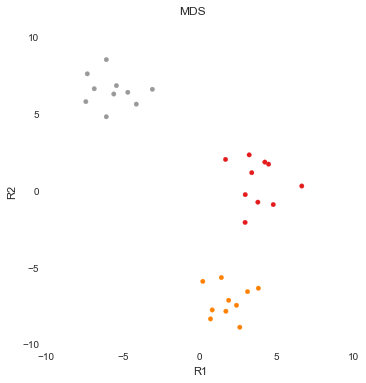

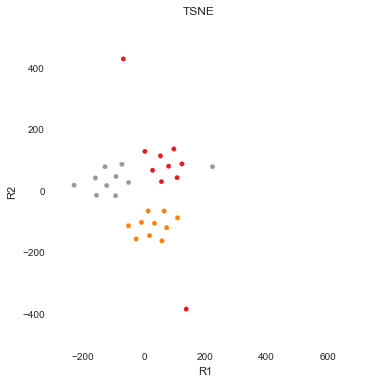

In [11]:
# Projection to 2D via dimensionality reduction
R_MDS = manifold.MDS(n_components=2).fit_transform(X)
scatterplot_2D(R_MDS, 'MDS', y)

R_TSNE = manifold.TSNE(n_components=2, perplexity=10.0).fit_transform(X)  # scaling for visualization purposes
scatterplot_2D(R_TSNE, 'TSNE', y)

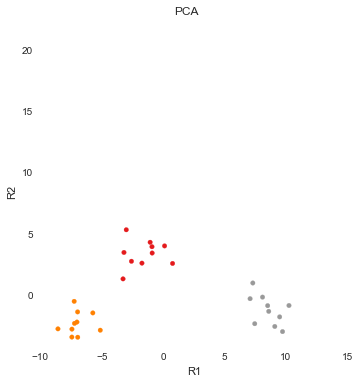

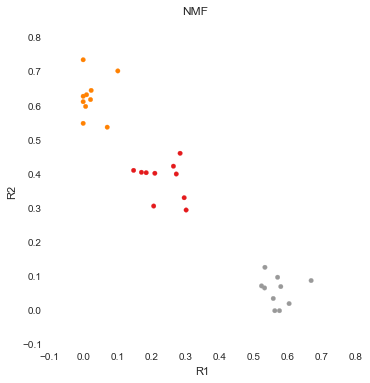

In [12]:
# Projection to 2D via decomposition
# Principal Component Analysis
R_PCA = decomposition.PCA(n_components=2).fit_transform(X)
scatterplot_2D(R_PCA, 'PCA', y)

# Nonnegative matrix factorization
# NMF requires non-negative values
X_nonnegative = preprocessing.MinMaxScaler().fit_transform(X)
R_NMF = decomposition.NMF(n_components=2).fit_transform(X_nonnegative)
scatterplot_2D(R_NMF, 'NMF', y)

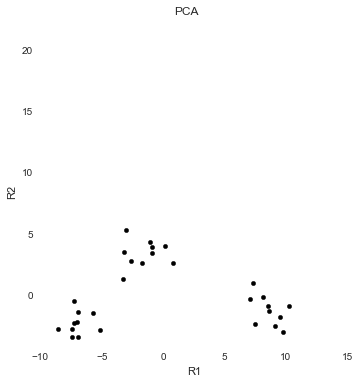

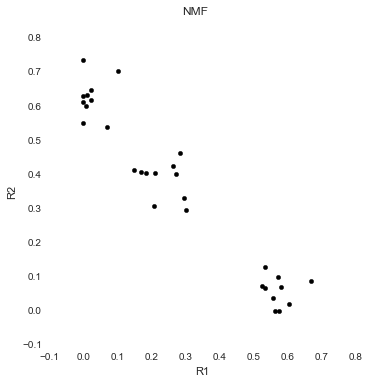

In [13]:
# In reality we usually do not know class labels
# We also do not know the number of classes

scatterplot_2D(R_PCA, 'PCA')
scatterplot_2D(R_NMF, 'NMF')

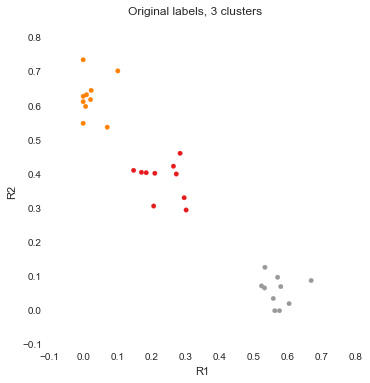

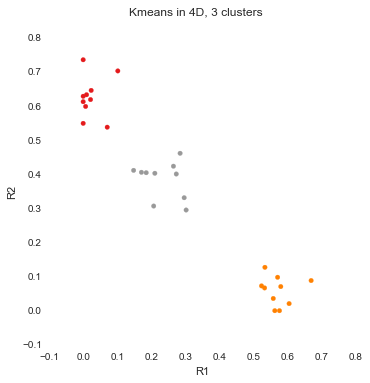

[0 2 1 0 2 1 1 0 1 2 1 2 1 2 1 0 1 2 2 1 2 2 1 0 0 0 0 0 2 0]
[2 1 0 2 1 0 0 2 0 1 0 1 0 1 0 2 0 1 1 0 1 1 0 2 2 2 2 2 1 2]
V measure 1.0
Adj. Rand score 1.0


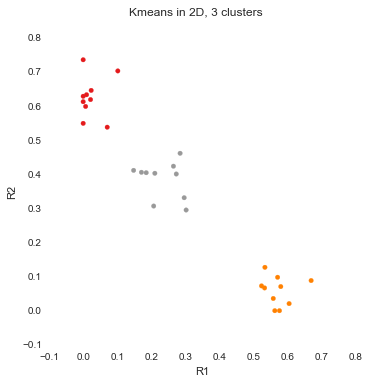

[0 2 1 0 2 1 1 0 1 2 1 2 1 2 1 0 1 2 2 1 2 2 1 0 0 0 0 0 2 0]
[2 1 0 2 1 0 0 2 0 1 0 1 0 1 0 2 0 1 1 0 1 1 0 2 2 2 2 2 1 2]
V measure 1.0
Adj. Rand score 1.0


In [14]:
from sklearn.metrics.cluster import v_measure_score, adjusted_rand_score

# Original labels:
scatterplot_2D(R_NMF, 'Original labels, 3 clusters', y)

# Clustering 4D dataset

kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(X)
scatterplot_2D(R_NMF, 'Kmeans in 4D, 3 clusters', kmeans.labels_)
print(y)
print(kmeans.labels_)
print("V measure", v_measure_score(y, kmeans.labels_))
print("Adj. Rand score", adjusted_rand_score(y, kmeans.labels_))


# Clustering 2D dataset
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(R_NMF)
scatterplot_2D(R_NMF, 'Kmeans in 2D, 3 clusters', kmeans.labels_)
print(y)
print(kmeans.labels_)
print("V measure", v_measure_score(y, kmeans.labels_))
print("Adj. Rand score", adjusted_rand_score(y, kmeans.labels_))

In [15]:
# How to measure success of clustering without true class labels?
# How to find the optimal number of clusters?
# Which clustering method to choose with what parameters?

{2: 0.64712364194048388,
 3: 0.69141643243019646,
 4: 0.59775805045292274,
 5: 0.44083350869636678,
 6: 0.35882158267528091,
 7: 0.33155217235962503,
 8: 0.36747279202709066,
 9: 0.40335396980166072,
 10: 0.39901404226866777}


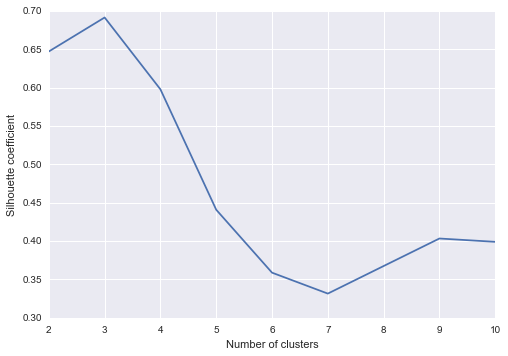

In [16]:
from sklearn.metrics.cluster import silhouette_score
import pprint

def calc_silhouette(data, n):
    """Runs Kmeans clustering and returns average silhouette coefficient"""    
    kmeans = cluster.KMeans(n_clusters=n).fit(data)
    score = silhouette_score(data, kmeans.labels_, metric='l2')
    return score

scores = {n: calc_silhouette(X, n) for n in range(2, 11)}
pprint.pprint(scores)
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.show()

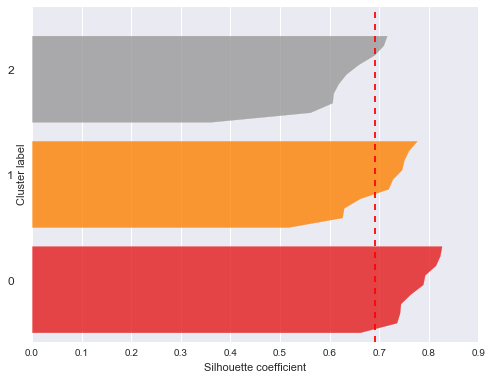

In [17]:
from sklearn.metrics.cluster import silhouette_samples

n_clusters = 3

# Compute the silhouette scores for each sample
kmeans = cluster.KMeans(n_clusters=n_clusters).fit(X)
lbls = kmeans.labels_
values = silhouette_samples(X, lbls)

g, ax = plt.subplots(figsize=(8, 6))
color_scale = np.linspace(0, 1, n_clusters)
y_lower = 1
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i
    v = sorted(values[lbls == i])
    cluster_size = len(v)
    y_upper = y_lower + cluster_size

    # color mapping:
    c = plt.cm.Set1(color_scale[i])
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, v, facecolor=c, edgecolor=c, alpha=0.8)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 1

ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Cluster label")

# Average silhouette score
score = silhouette_score(X, lbls, metric='l2')
ax.axvline(x=score, color="red", linestyle="--")
ax.set_yticks([])
plt.show()


## Example: Gene expression in Breast Cancer (BRCA)

In [18]:
from pathlib import Path

ICGC_API = 'https://dcc.icgc.org/api/v1/download?fn=/release_18/Projects/BRCA-US/'

# clinical_fname = 'clinical.BRCA-US.tsv.gz'
# if not Path(clinical_fname).is_file():
#     urllib.request.urlretrieve(ICGC_API + 'clinical.BRCA-US.tsv.gz', clinical_fname);

expression_fname = 'protein_expression.BRCA-US.tsv.gz'
if not Path(expression_fname).is_file():
    urllib.request.urlretrieve(ICGC_API + 'protein_expression.BRCA-US.tsv.gz', expression_fname);

In [19]:
# C = np.genfromtxt(clinical_fname, delimiter='\t', dtype='object', 
#                   skip_header=1, usecols=(0, 17, 19))
# E = np.genfromtxt(expression_fname, delimiter='\t', dtype=("|U10", "|U10", "|U10", float), 
#                   skip_header=1, usecols=(0, 2, 7, 10))

E = pd.read_csv(expression_fname, delimiter='\t')

In [20]:
E.head()

,icgc_donor_id,project_code,icgc_specimen_id,icgc_sample_id,submitted_sample_id,analysis_id,antibody_id,gene_name,gene_stable_id,gene_build_version,normalized_expression_level,verification_status,verification_platform,platform,experimental_protocol,raw_data_repository,raw_data_accession
0,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,PAI-1,SERPINE1,NaN,NaN,1.769954,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
1,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ARID1A,ARID1A,NaN,NaN,0.619539,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
2,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,mTOR_pS2448,FRAP1,NaN,NaN,-0.538637,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
3,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,ASNS,ASNS,NaN,NaN,1.156044,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20
4,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,EGFR,EGFR,NaN,NaN,0.120138,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20


In [21]:
donors = set(E['icgc_donor_id'])
genes = set(E['gene_name'])
print(len(donors))
print(len(genes))

298
115


In [22]:
donor2id = {donor: i for i, donor in enumerate(donors)}
id2donor = dict(zip(donor2id.values(), donor2id.keys()))

gene2id = {gene: i for i, gene in enumerate(genes)}
id2gene = dict(zip(gene2id.values(), gene2id.keys()))

data = np.zeros((len(donors), len(genes)))
for i in range(len(E)):
    data[donor2id[E.loc[i, 'icgc_donor_id']], gene2id[E.loc[i, 'gene_name']]] = float(E.loc[i, 'normalized_expression_level'])

In [26]:
# normalize data
# data = preprocessing.Normalizer().fit_transform(data)
data = preprocessing.MinMaxScaler().fit_transform(data)

[[ 0.08086039  0.48214882  0.20054217 ...,  0.21180534  0.54303296
   0.63999161]
 [ 0.15776327  0.29733806  0.17905491 ...,  0.30279435  0.58064571
   0.28672132]
 [ 0.05516016  0.77076779  0.2699729  ...,  0.49275056  0.19105061
   0.56900897]
 ..., 
 [ 0.12517104  0.29727067  0.18689871 ...,  0.5047767   0.42092811
   0.35620001]
 [ 0.14703063  0.18498319  0.20027217 ...,  0.41218087  0.3355541
   0.23481469]
 [ 0.10487315  0.55097151  0.50910691 ...,  0.40073198  0.36636362
   0.61843694]]


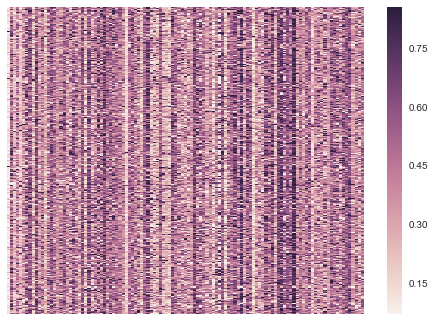

In [27]:
print(data)
sns.heatmap(data, robust=True, square=False, yticklabels=False, xticklabels=False, cbar=True)
plt.show()

V ~ W dot H + error
Error =  20.558629669388147
V =  (298, 115)
W =  (10, 115)
H =  (298, 10)


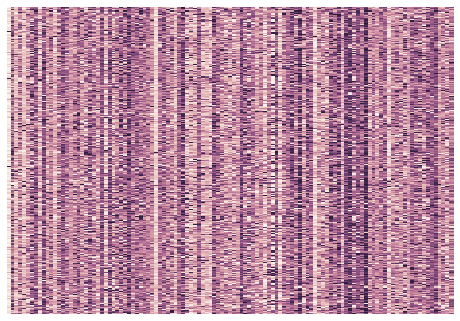

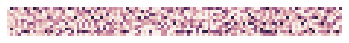

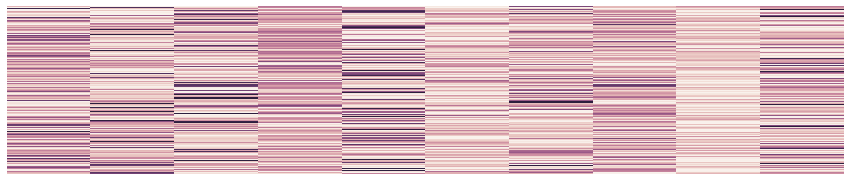

In [29]:
rank = 10
nmf = decomposition.NMF(n_components=rank).fit(data)
V = data
W = nmf.components_
H = nmf.transform(data)
print("V ~ W dot H + error")
print("Error = ", nmf.reconstruction_err_)
print("V = ", V.shape)
print("W = ", W.shape)
print("H = ", H.shape)

sns.heatmap(V, robust=True, square=False, yticklabels=False, xticklabels=False, cbar=False)
plt.show()
g, ax = plt.subplots(figsize=(6,6))
sns.heatmap(W,  robust=True, square=True, yticklabels=False, xticklabels=False, cbar=False)
plt.show()
g, ax = plt.subplots(figsize=(15, 3))
sns.heatmap(H, robust=True,  square=False, yticklabels=False, xticklabels=False, cbar=False)
plt.show()

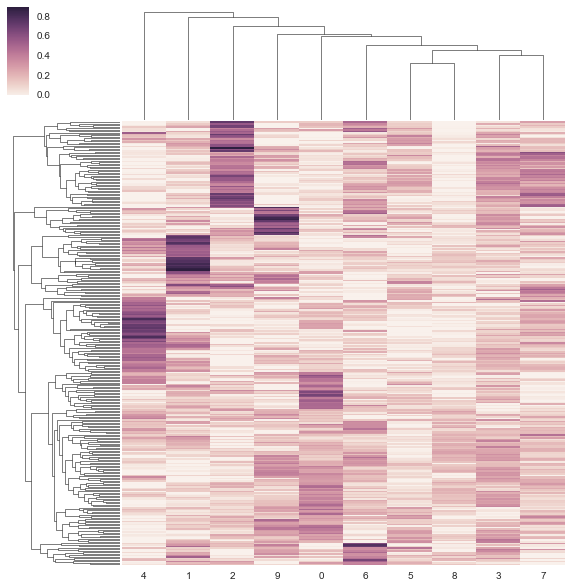

In [30]:
sns.clustermap(H, xticklabels=True, yticklabels=False)
plt.show()

## Plot dendrogram and a heatmap

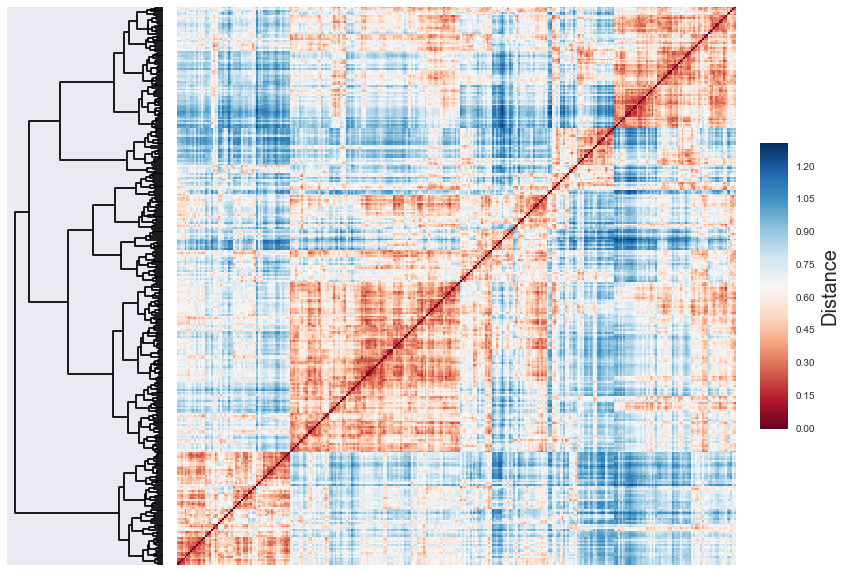

In [31]:
def clean_axis(ax):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)

# Figure is a grid with two parts  1 : 4
fig = plt.figure(figsize=(14, 10))
grid = gridspec.GridSpec(1, 2, wspace=.01, hspace=0., width_ratios=[0.25, 1])

Y = scipy.cluster.hierarchy.linkage(H, method='ward', metric='euclidean')
# also look up:
# method = [ average (UPGMA), complete, single, ward ]
# and metric

# Dendrogram
ax = fig.add_subplot(grid[0,0])
denD = scipy.cluster.hierarchy.dendrogram(Y, orientation='left', link_color_func=lambda k: 'black')
clean_axis(ax)

# Heatmap
ax = fig.add_subplot(grid[0,1])
D = pairwise_distances(H, metric = 'euclidean')
D = D[denD['leaves'], :][:, denD['leaves']]
axi = ax.imshow(D, interpolation='nearest', aspect='equal', origin='lower', cmap='RdBu') 
clean_axis(ax)

# Legend for heatmap
cb = fig.colorbar(axi, fraction=0.046, pad=0.04, aspect=10) 
cb.set_label('Distance', fontsize=20)


Indices of related genes [ 85  21  31  65  33  76   1  87  20 104]
Gene weights [ 0.6469694   0.6696827   0.71013077  0.71119402  0.77323896  0.81524007
  0.82984056  0.95183276  1.0650577   1.0822736 ]


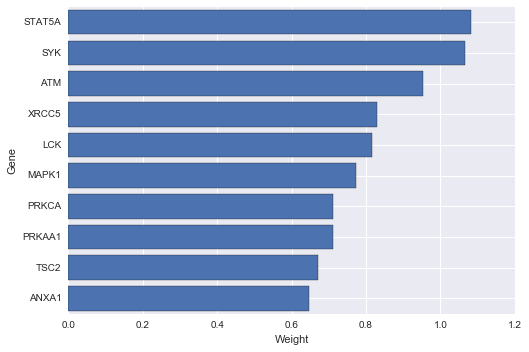

In [32]:
gene_group = 7
topk = np.argsort(np.asarray(W[gene_group, :]).flatten())[-10:]
print("Indices of related genes", topk)
val = W[gene_group, topk]
print("Gene weights", val)

plt.barh(np.arange(10) + .5, val, align="center")
labels = [id2gene[idx] for idx in topk]
plt.yticks(np.arange(10) + .5, labels)
plt.xlabel("Weight")
plt.ylabel("Gene");

In [33]:
# Go to GO website http://geneontology.org and perform enrichment analysis on this group of genes
print('\n'.join(reversed(labels)))

STAT5A
SYK
ATM
XRCC5
LCK
MAPK1
PRKCA
PRKAA1
TSC2
ANXA1


## Additional application: Dimensionality reduction in Feature Selection

Optimal number of features : 4


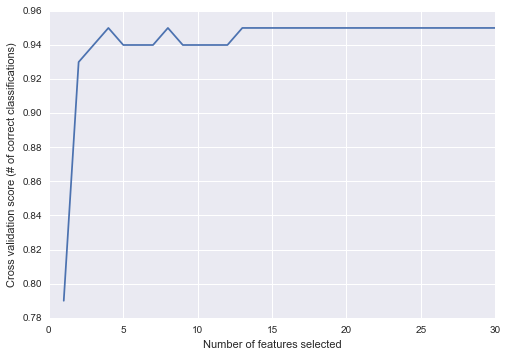

In [34]:
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV

from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=100, n_features=30, n_informative=5,
                           n_redundant=25, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear", class_weight="balanced")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (# of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Exercises
 * Change clustering methods from Kmeans to DBSCAN and AgglomerativeClustering
 * Experiment with different combinations of linkage and metric in AgglomerativeClustering
 * Perform enrichment analysis on differnt groups of genes associated with differential expression in BRCA cancer patients
 * Map cancer patients from 10-dimensional space (H matrix) to 2D space, cluster and show them as a scatterplot. Experiment with different dimensionality reduction methods